<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB5_CLASS_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MERGE

In [2]:
import pandas as pd

# 테이블 만들기
left = pd.DataFrame({ 'id':[1,2,3,4,5],
'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame( {'id':[1,2,3,4,5],
'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
'subject_id':['sub2','sub4','sub3','sub6','sub5']})

In [3]:
# 테이블 확인
left

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5


In [4]:
right

,id,Name,subject_id
0,1,Billy,sub2
1,2,Brian,sub4
2,3,Bran,sub3
3,4,Bryce,sub6
4,5,Betty,sub5


In [5]:
# 왼쪽 병합
pd.merge(left, right, on='subject_id', how='left')

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


In [6]:
# 오른쪽 병합
pd.merge(left, right, on='subject_id', how='right')

,id_x,Name_x,subject_id,id_y,Name_y
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,NaN,NaN,sub3,3,Bran
3,4.0,Alice,sub6,4,Bryce
4,5.0,Ayoung,sub5,5,Betty


In [7]:
# 내부 병합
pd.merge(left, right, on='subject_id', how='inner')

,id_x,Name_x,subject_id,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub4,2,Brian
2,4,Alice,sub6,4,Bryce
3,5,Ayoung,sub5,5,Betty


In [8]:
# 외부 병합
pd.merge(left, right, on='subject_id', how='outer')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,NaN,NaN,sub3,3.0,Bran
3,3.0,Allen,sub4,2.0,Brian
4,5.0,Ayoung,sub5,5.0,Betty
5,4.0,Alice,sub6,4.0,Bryce


In [9]:
# 공통키가 두개인 경우
pd.merge(left,right,on=['id','subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Alice,sub6,Bryce
1,5,Ayoung,sub5,Betty


# CONCAT

In [11]:
# 데이터 생성
df1 = pd.DataFrame([['a', 1], ['b', 2]],
columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
columns=['letter', 'number'])

In [12]:
df1

,letter,number
0,a,1
1,b,2


In [13]:
df2

,letter,number
0,c,3
1,d,4


In [14]:
# 위아래로 붙이기
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [ ]:
# 옆으로 붙이기
pd.concat([df1, df2], axis=1)

# 대출 데이터 준비작업

In [15]:
# 파일 열기
train = pd.read_csv('/content/loan_train.csv')
test = pd.read_csv('/content/loan_test.csv')

In [17]:
# 사이즈 체크
print('훈련데이터 사이즈: ', train.shape)
print('테스트데이터 사이즈: ', test.shape)

훈련데이터 사이즈:  (614, 13)
테스트데이터 사이즈:  (367, 12)


In [18]:
# 훈련데이터 컬럼이름 확인
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
# 테스트 데이터 컬럼이름 확인
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [22]:
# 테스트 데이터에 Loan_Staus 컬럼 생성해서 1을 할당
test['Loan_Status'] = 1

In [24]:
# 사이즈 및 컬럼 체크
test.shape
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
 # 위아래로 합치기
 df = pd.concat([train, test])

In [27]:
# 전처리 작업 후 데이터를 나누는 경우
df.iloc[:614]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 피벗테이블

In [34]:
# 데이터 생성
A = ['foo']*5 + ['bar']*4
B = ['one']*3 + ['two']*2 + ['one']*2 + ['two']*2

In [45]:
import random

# 리스트에서 임의로 한개를 뽑는 함수
size_lst = []
for i in range(9):
    size_lst.append(random.choice(['small', 'large']))

In [ ]:
size_lst

In [47]:
# 한줄로 줄이는 방법
C = [random.choice(['small', 'large']) for i in range(9)]
C

['large',
 'large',
 'small',
 'small',
 'small',
 'large',
 'large',
 'large',
 'large']

In [60]:
# 특정 범위에서 숫자를 임의로 뽑는 방법
D = [random.randint(1, 7) for i in range(9)]
E = [random.randint(2, 9) for i in range(9)]

[6, 9, 9, 4, 9, 3, 5, 7, 3]

In [64]:
# 리스트 길이가 같아야 데이터 프레임이 만들어짐
len(A), len(B), len(C), len(D), len(E)

(9, 9, 9, 9, 9)

In [62]:
df = pd.DataFrame({
    'A': A,
    'B': B,
    'C': C,
    'D': D,
    'E': E
})
df

,A,B,C,D,E
0,foo,one,large,4,6
1,foo,one,large,3,9
2,foo,one,small,1,9
3,foo,two,small,6,4
4,foo,two,small,1,9
5,bar,one,large,1,3
6,bar,one,large,3,5
7,bar,two,large,2,7
8,bar,two,large,1,3


In [66]:
import numpy as np

In [68]:
tab = pd.pivot_table(df, values='D', index=['A', 'B'],
               columns='C', aggfunc=np.sum)

<ipython-input-68-13a8d5f2bf96>:1: FutureWarning: The provided callable <function sum at 0x7978e05900d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tab = pd.pivot_table(df, values='D', index=['A', 'B'],


<Axes: xlabel='A,B'>

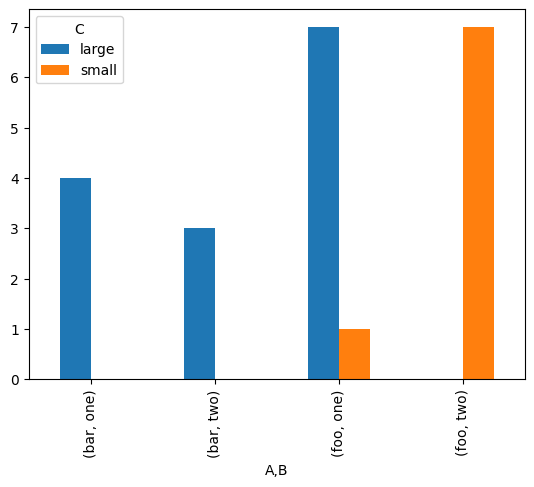

In [69]:
tab.plot(kind='bar')

# 피벗테이블을 이용해서 고객데이터 분석

In [74]:
# 파일 읽어서 확인
customer = pd.read_excel('/content/xlmd_customer.xls', header=1)
customer.head()

,CUST ID,REGION,RENT VS. OWN,NUM HOUSEHOLD,ANNUAL INCOME,TOTAL PURCHASES,NUM PURCHASES
0,1,North,Own,1,10K-25K,38,1
1,2,South,Own,4,100K+,30,4
2,3,North,Rent,3,25K-50K,19,3
3,4,West,Own,5,25K-50K,21,6
4,5,East,Own,6,50K-100K,35,7


In [79]:
tab = pd.pivot_table(customer, values='TOTAL PURCHASES', index=['NUM HOUSEHOLD'], columns=['REGION'], aggfunc=np.mean)

<ipython-input-79-706c7eaf0639>:1: FutureWarning: The provided callable <function mean at 0x7978e0591000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tab = pd.pivot_table(customer, values='TOTAL PURCHASES', index=['NUM HOUSEHOLD'], columns=['REGION'], aggfunc=np.mean)


<Axes: xlabel='NUM HOUSEHOLD'>

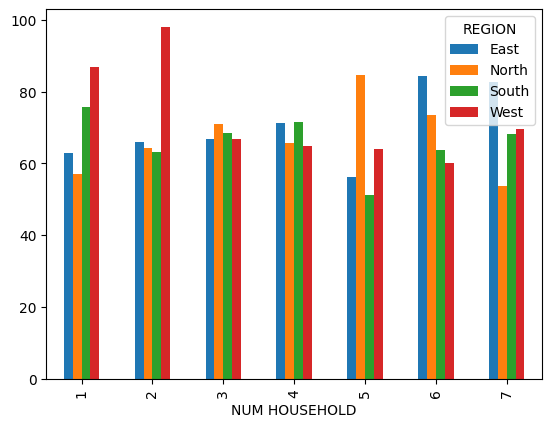

In [80]:
tab.plot(kind='bar')

# 크로스탭

In [82]:
# 데이터 생성
foo = pd.Categorical(['a', 'b'], categories=['a', 'b', 'c'])
bar = pd.Categorical(['d', 'e'], categories=['d', 'e', 'f'])

In [83]:
foo

['a', 'b']
Categories (3, object): ['a', 'b', 'c']

In [84]:
bar

['d', 'e']
Categories (3, object): ['d', 'e', 'f']

In [85]:
# 크로스탭은 갯수를 세줌
table = pd.crosstab(foo, bar, dropna=False)
table

col_0,d,e,f
row_0,,,
a,1,0,0
b,0,1,0
c,0,0,0


<Axes: xlabel='row_0'>

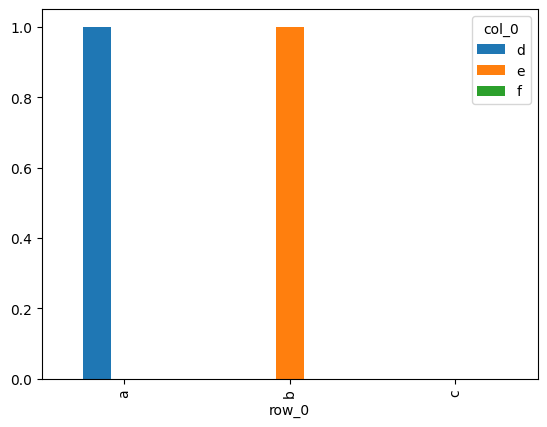

In [86]:
table.plot(kind='bar')

# 고객테이블을 가지고 크로스탭 생성

In [87]:
pd.crosstab(customer['REGION'], customer['NUM HOUSEHOLD'])

NUM HOUSEHOLD,1,2,3,4,5,6,7
REGION,,,,,,,
East,16,15,30,31,24,19,13
North,10,21,30,17,24,17,6
South,3,21,16,27,14,10,7
West,8,10,21,31,21,19,6


# APPLY 함수

In [90]:
df = pd.DataFrame([[4, 9],] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [91]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [92]:
df.apply(np.sum, axis=0) #열로 적용

,0
A,12
B,27


In [93]:
df.apply(np.sum, axis=1) #행으로 적용

,0
0,13
1,13
2,13


# MAP 함수

In [105]:
map(np.sqrt, df)

In [106]:
df.map(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [97]:
fruit_lst = ['apple', 'banana', 'cherry', 'durian', 'elderberry']

In [95]:
def word_len(x):
    return len(x)

In [100]:
list(map(word_len, fruit_lst))

[5, 6, 6, 6, 10]